<a href="https://colab.research.google.com/github/ajaysinggh/data-science-projects/blob/master/Student_Intervention_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from time import time
from sklearn.metrics import f1_score,accuracy_score,classification_report,roc_curve,confusion_matrix

In [ ]:
# IMPORTING THE DATASET
stud_df = pd.read_csv("C:\\Users\\AJAY SINGH\\students_data.csv")
print("shape of the dataset:",stud_df.shape)
stud_df.head()

shape of the dataset: (395, 31)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [ ]:
# THE TARGET VARIABLE "PASSED" CONTAINS CATEGORICAL DATA ONLY ( YES AND NO) ONLY 
# SO IT A CLASSIFICATION PROBLEM

In [ ]:
# FEATURE NAMES OF THE DATASET
stud_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [ ]:
# CHECKING THE SUMMARY OF THE COMTINOUS DATA FEATURES INTO THE DATASET
stud_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [ ]:
# SUMMARY OF THE OBJECT FEATURES OF THE DATASET
stud_df.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,yes
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,265


In [ ]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

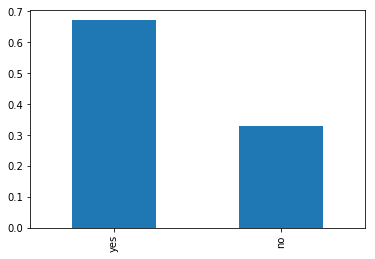

In [ ]:
# CHECKING THE VALUE COUNT OF THE TARGET VARIABLE
stud_df['passed'].value_counts(normalize=True).plot.bar()

In [ ]:
stud_target = stud_df.iloc[:,-1].values

In [ ]:
# TRANSFORMING THE TARGET VARIABLE INTO BINARY FORM THROUGH LABEL ENCODER
# IMPORTING THE LIBRARY
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_names = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','passed']
for i in cat_names:
    stud_df[i]=le.fit_transform(stud_df[i])
    #print(stud_df.head())
    stud_df = pd.DataFrame(stud_df)

print(stud_df.shape)
print("Type of the dataset :\n",type(stud_df))
print('\n')
print("features of the dataset:\n",stud_df.head())

(395, 31)
Type of the dataset :
 <class 'pandas.core.frame.DataFrame'>


features of the dataset:
    school  sex  age  address  famsize  Pstatus  Medu  Fedu     Mjob      Fjob  \
0       0    0   18        1        0        0     4     4  at_home   teacher   
1       0    0   17        1        0        1     1     1  at_home     other   
2       0    0   15        1        1        1     1     1  at_home     other   
3       0    0   15        1        0        1     4     2   health  services   
4       0    0   16        1        0        1     3     3    other     other   

   ... internet romantic  famrel  freetime  goout  Dalc  Walc  health  \
0  ...        0        0       4         3      4     1     1       3   
1  ...        1        0       5         3      3     1     1       3   
2  ...        1        0       4         3      2     2     3       3   
3  ...        1        1       3         2      2     1     1       5   
4  ...        0        0       4         3      2

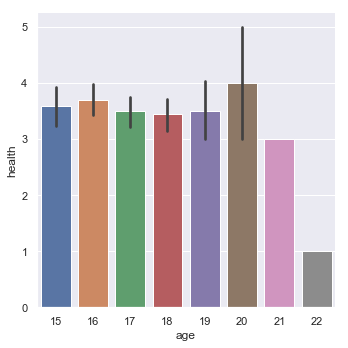

In [ ]:
# VISUALIZING THE COUNTPLOT OF THE TARGET VARIABLE WITH FEATURES OF THE DATA
sns.set(style='darkgrid')
sns.factorplot(x='age',y='health',data=stud_df,kind='bar')

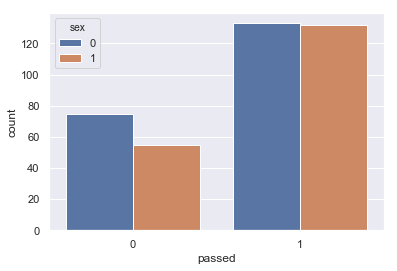

In [ ]:
sns.countplot(x='passed',hue='sex',data=stud_df)

In [ ]:
# YES MEANS PASSED AND NO MEANS FAILED
# IT IS CLEAR THAT FEMALE TENDS TO BE MORE FAILED THAN MEN

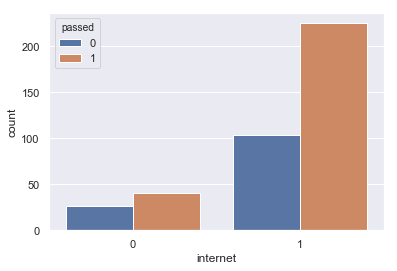

In [ ]:
sns.countplot(x='internet',hue='passed',data=stud_df)

In [ ]:
# PRINTING THE VALUE_COUNTS OF THE CATEGORICAL FEATURE
print(stud_df['Mjob'].value_counts())
print('__'*40)
print(stud_df['Fjob'].value_counts())
print('__'*40)
print(stud_df['reason'].value_counts())
print('__'*40)
print(stud_df['guardian'].value_counts())

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
________________________________________________________________________________
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
________________________________________________________________________________
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
________________________________________________________________________________
mother    273
father     90
other      32
Name: guardian, dtype: int64


In [ ]:
Mjob_dummies=pd.get_dummies(stud_df['Mjob'],prefix='Mjob')
Fjob_dummies=pd.get_dummies(stud_df['Fjob'],prefix='Fjob')
reason_dummies=pd.get_dummies(stud_df['reason'],prefix='reason')
guardian_dummies=pd.get_dummies(stud_df['guardian'],prefix='guardian')

In [ ]:
print("head of the Mjob dummies data :\n",Mjob_dummies.head())
print("__"*60)
print("head of the Fjob dummies data :\n",Fjob_dummies.head())
print("__"*60)
print("head of the reason dummies data :\n",reason_dummies.head())
print("__"*60)
print("head of the guardian dummies data :\n",guardian_dummies.head())

head of the Mjob dummies data :
    Mjob_at_home  Mjob_health  Mjob_other  Mjob_services  Mjob_teacher
0             1            0           0              0             0
1             1            0           0              0             0
2             1            0           0              0             0
3             0            1           0              0             0
4             0            0           1              0             0
________________________________________________________________________________________________________________________
head of the Fjob dummies data :
    Fjob_at_home  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher
0             0            0           0              0             1
1             0            0           1              0             0
2             0            0           1              0             0
3             0            0           0              1             0
4             0            0           1   

In [ ]:
print("type of the stud_df :\n",type(stud_df))
print("type of the stud_df :\n",type(stud_target))
print("type of the dummies:\n",type(Mjob_dummies))
print("type of the dummies:\n",type(Fjob_dummies))
print("type of the dummies:\n",type(reason_dummies))
print("type of the dummies:\n",type(guardian_dummies))

type of the stud_df :
 <class 'pandas.core.frame.DataFrame'>
type of the stud_df :
 <class 'numpy.ndarray'>
type of the dummies:
 <class 'pandas.core.frame.DataFrame'>
type of the dummies:
 <class 'pandas.core.frame.DataFrame'>
type of the dummies:
 <class 'pandas.core.frame.DataFrame'>
type of the dummies:
 <class 'pandas.core.frame.DataFrame'>


In [ ]:
stud_target = pd.DataFrame(stud_target)

In [ ]:
stud_df = pd.concat([stud_df,stud_target],axis=1)

In [ ]:
stud_df = pd.concat([stud_df,Mjob_dummies,Fjob_dummies,reason_dummies,guardian_dummies],axis=1)

In [ ]:
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,at_home,teacher,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,at_home,other,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,at_home,other,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,health,services,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,other,other,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
stud_df.drop(['Mjob','Fjob','reason','guardian',0],axis=1,inplace=True)

In [ ]:
print("shape of the features of the data features:\n",stud_df.shape)
print('__'*40)
print("Info the features of the dataset:\n",stud_df.info())

shape of the features of the data features:
 (395, 44)
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 44 columns):
school               395 non-null int32
sex                  395 non-null int32
age                  395 non-null int64
address              395 non-null int32
famsize              395 non-null int32
Pstatus              395 non-null int32
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
schoolsup            395 non-null int32
famsup               395 non-null int32
paid                 395 non-null int32
activities           395 non-null int32
nursery              395 non-null int32
higher               395 non-null int32
internet             395 non-null int32
romantic             395 non-null int32

In [ ]:
# CORRELATION OF THE CONTINOUS FEATURES THROUGH HEATMAP
cname = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','passed']
corr_df = stud_df[cname].corr()
corr_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,passed
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.179645
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.115396
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.108057
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.044446
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.074613
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.337731
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.046683
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,-0.018321
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.183399
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.057343


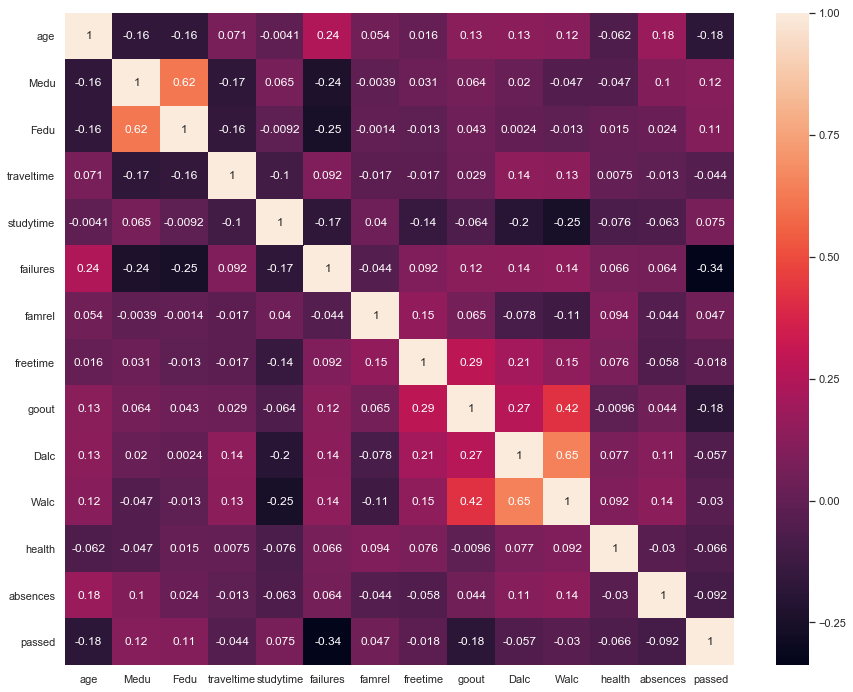

In [ ]:
f,ax=plt.subplots(figsize=(15,12))
sns.heatmap(corr_df,annot=True)

In [ ]:
# FROM THE HEATMAP IT IS CLEAR THAT FEATURE FEDU , MEDU AND FAILURES ARE NEGATIVELY CORRELATED TO EACH OTHER

In [ ]:
stud_df['Mjob_at_home']=stud_df['Mjob_at_home'].astype("int64")
stud_df['Mjob_health']=stud_df['Mjob_health'].astype("int64")
stud_df['Mjob_other']=stud_df['Mjob_other'].astype("int64")
stud_df['Mjob_services']=stud_df['Mjob_services'].astype("int64")
stud_df['Mjob_teacher']=stud_df['Mjob_teacher'].astype("int64")
stud_df['Fjob_at_home']=stud_df['Fjob_at_home'].astype("int64")
stud_df['Fjob_health']=stud_df['Fjob_health'].astype("int64")
stud_df['Fjob_other']=stud_df['Fjob_other'].astype("int64")
stud_df['Fjob_services']=stud_df['Fjob_services'].astype("int64")
stud_df['Fjob_teacher']=stud_df['Fjob_teacher'].astype("int64")

In [ ]:
stud_df['reason_course']=stud_df['reason_course'].astype("int64")
stud_df['reason_home']=stud_df['reason_home'].astype("int64")
stud_df['reason_other']=stud_df['reason_other'].astype("int64")
stud_df['reason_reputation']=stud_df['reason_reputation'].astype("int64")
stud_df['guardian_father']=stud_df['guardian_father'].astype("int64")
stud_df['guardian_mother']=stud_df['guardian_mother'].astype("int64")
stud_df['guardian_other']=stud_df['guardian_other'].astype("int64")
print("Info the features of the dataset:\n",stud_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 44 columns):
school               395 non-null int32
sex                  395 non-null int32
age                  395 non-null int64
address              395 non-null int32
famsize              395 non-null int32
Pstatus              395 non-null int32
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
schoolsup            395 non-null int32
famsup               395 non-null int32
paid                 395 non-null int32
activities           395 non-null int32
nursery              395 non-null int32
higher               395 non-null int32
internet             395 non-null int32
romantic             395 non-null int32
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc           

In [ ]:
# CHECKING FOR THE CORRELATION OF CATEGORICAL FEATURES
# IMPORTING THE LIBRARY
from scipy.stats import chi2_contingency
cat_name = ['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','passed']
for i in cat_name:
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(stud_df['passed'],stud_df[i]))
    print(p)
    

0.6496520320478856
0.19488312384342535
0.36259725500729156
0.47557425845124546
0.483964650286848
0.06799816590050815
0.2859479949107493
0.08287639010664817
0.8889514378601399
0.9665274166728246
0.003850210443867274
0.2781223614805821
0.06740351881393333
6.494113725639884e-87


In [ ]:
# SPILLTING THE DATASET INTO INDEPENDENT : X AND DEPENDENT : Y VARIABLES
x = stud_df.drop('passed',axis=1)
y = stud_df['passed']

In [ ]:
# SCALING THE DATASET THROUGH STANDARD SCALER
# IMPORTING THE LIBRARY
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,0.792251,-0.042286,...,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.643249,1.150779,...,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,...,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908


In [ ]:
# IMPORTING TRAIN _TEST SPLIT AS THE DATA IS LESS AND FEATURES ARE MORE
# IMPORTING THE LIBRARY
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=47,stratify=y)

In [ ]:
# MODELS
# IMPORTING THE LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
lg = LogisticRegression(random_state=47)
dtc = DecisionTreeClassifier(criterion='gini',random_state=47,max_depth=3)
rf = RandomForestClassifier(n_estimators=10,random_state=47,n_jobs=-1,max_depth=3)
svc = SVC(random_state=47)

In [ ]:
def train_classifier(clf, x_train, y_train):
    # FITTING THE CLASSIFIER ON THE TRAINING DATA

    # CALCULATING THE TIME OF THE MODEL TO FIT THROUGH TIME FUNCTION
    start = time()
    clf.fit(x_train, y_train)
    end = time()

    # PRINT THE RESULT
    print("time of the training:",end-start)


In [ ]:
def predict_labels(clf, x_test, y_test):
    # MAKING PREDICTIONS AND CALCULATING THE MEASURE SCORE OF THE MODEL

   #CALCULATING THE TIME OF THE MODEL TO FIT THROUGH TIME FUNCTION
    start = time()
    y_pred = clf.predict(x_test)
    end = time()
    

    # PRINT THE RESULT
    print('f1 score:\n' , f1_score(y_test,y_pred))
    print("__"*40)
    print('accuracy_score:\n',  accuracy_score(y_test,y_pred))
    print("__"*40)
    print('classification_report:\n', classification_report(y_test,y_pred))
    print("__"*40)
    print('confusion matrix :\n',confusion_matrix(y_test,y_pred))

In [ ]:
# LOGISTIC REGRESSION MODEL
train_classifier(lg,x_train,y_train)
predict_labels(lg,x_test,y_test)

time of the training: 0.006640911102294922
f1 score:
 0.8392857142857143
________________________________________________________________________________
accuracy_score:
 0.7721518987341772
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.70      0.54      0.61        26
           1       0.80      0.89      0.84        53

   micro avg       0.77      0.77      0.77        79
   macro avg       0.75      0.71      0.72        79
weighted avg       0.76      0.77      0.76        79

________________________________________________________________________________
confusion matrix :
 [[14 12]
 [ 6 47]]


In [ ]:
# DECISION TREE 
train_classifier(dtc,x_train,y_train)
predict_labels(dtc,x_test,y_test)

time of the training: 0.006969451904296875
f1 score:
 0.7522935779816513
________________________________________________________________________________
accuracy_score:
 0.6582278481012658
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.48      0.42      0.45        26
           1       0.73      0.77      0.75        53

   micro avg       0.66      0.66      0.66        79
   macro avg       0.61      0.60      0.60        79
weighted avg       0.65      0.66      0.65        79

________________________________________________________________________________
confusion matrix :
 [[11 15]
 [12 41]]


In [ ]:
# RANDOM FOREST
train_classifier(rf,x_train,y_train)
predict_labels(rf,x_test,y_test)

time of the training: 0.18275737762451172
f1 score:
 0.8064516129032259
________________________________________________________________________________
accuracy_score:
 0.6962025316455697
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.62      0.19      0.29        26
           1       0.70      0.94      0.81        53

   micro avg       0.70      0.70      0.70        79
   macro avg       0.66      0.57      0.55        79
weighted avg       0.68      0.70      0.64        79

________________________________________________________________________________
confusion matrix :
 [[ 5 21]
 [ 3 50]]


In [ ]:
# SUPPORT VECTOR CLASSIFIER
train_classifier(svc,x_train,y_train)
predict_labels(svc,x_test,y_test)

time of the training: 0.0242159366607666
f1 score:
 0.8264462809917356
________________________________________________________________________________
accuracy_score:
 0.7341772151898734
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.73      0.31      0.43        26
           1       0.74      0.94      0.83        53

   micro avg       0.73      0.73      0.73        79
   macro avg       0.73      0.63      0.63        79
weighted avg       0.73      0.73      0.70        79

________________________________________________________________________________
confusion matrix :
 [[ 8 18]
 [ 3 50]]


 APPLYING PRINCIPAL COMPONENT ANALYSIS

In [ ]:
# IMPORTING THE LIBRARY
from sklearn.decomposition import PCA
pca = PCA()

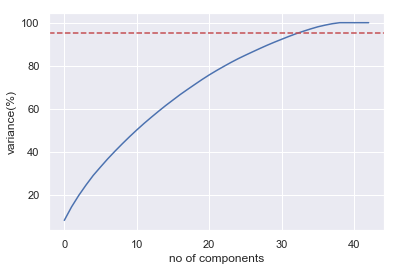

In [ ]:
x = pca.fit_transform(x)
# VISUALIZING 
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("no of components")
plt.ylabel("variance(%)")
plt.axhline(y=95,color='r',linestyle='--')

In [ ]:
# NOW WE CAN SEE THE COMPONENTS CAN BE 30
pca = PCA(n_components=30)
x=pca.fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.696420,-0.543569,-0.830530,2.943415,-0.903290,0.238887,2.663675,0.812153,3.429692,-0.306524,...,-0.517525,-0.114021,0.272635,0.388427,-0.240730,-0.712463,-0.528385,-0.272355,-0.151985,0.210817
1,1.587596,-2.333203,1.025253,1.215612,1.691928,-0.245996,-0.378067,-0.520318,-0.521157,-2.210893,...,-1.710224,0.954123,-0.940575,0.825386,0.075980,0.128886,-0.088777,0.933475,-0.494616,0.308789
2,1.854501,-0.992269,-0.440001,0.336069,-0.960559,-1.259283,-1.459209,3.490023,0.634674,-0.604033,...,0.897180,-0.407946,0.306147,-1.396247,-1.061184,-1.689445,-0.556081,-0.532098,-1.068841,1.875582
3,-2.903551,-0.834788,1.208169,-0.289667,-1.000191,-0.526718,-0.165848,1.593953,-1.732435,-0.949278,...,1.476163,0.135455,1.381948,0.795280,-0.235643,-0.475907,-0.706855,-0.049396,-0.225904,-0.459977
4,-0.545183,-1.688027,0.805115,-1.191339,2.276270,0.940360,1.259853,1.096291,-0.458430,-1.033753,...,-1.295317,0.026585,1.201065,-0.791168,-0.577794,1.403173,-0.173034,0.612124,-0.167623,0.414276


In [ ]:
# SO THE ROWS OF THE DATASET IS REDUCED TO 30 NOW
# NOW AGAIN APPLYING THE MODELS

In [ ]:
# IMPORTING TRAIN _TEST SPLIT AS THE DATA IS LESS AND FEATURES ARE MORE
# IMPORTING THE LIBRARY
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=47,stratify=y)

In [ ]:
def train_classifier(clf, x_train, y_train):
    # FITTING THE CLASSIFIER ON THE TRAINING DATA

    # CALCULATING THE TIME OF THE MODEL TO FIT THROUGH TIME FUNCTION
    start = time()
    clf.fit(x_train, y_train)
    end = time()

    # PRINT THE RESULT
    print("time of the training:",end-start)
    
    
    
    
def predict_labels(clf, x_test, y_test):
    # MAKING PREDICTIONS AND CALCULATING THE MEASURE SCORE OF THE MODEL

   #CALCULATING THE TIME OF THE MODEL TO FIT THROUGH TIME FUNCTION
    start = time()
    y_pred = clf.predict(x_test)
    end = time()
    

    # PRINT THE RESULT
    print('f1 score:\n' , f1_score(y_test,y_pred))
    print("__"*40)
    print('accuracy_score:\n',  accuracy_score(y_test,y_pred))
    print("__"*40)
    print('classification_report:\n', classification_report(y_test,y_pred))
    print("__"*40)
    print('confusion matrix :\n',confusion_matrix(y_test,y_pred))

In [ ]:
# LOGISTIC REGRESSION MODEL
train_classifier(lg,x_train,y_train)
predict_labels(lg,x_test,y_test)

time of the training: 0.013373613357543945
f1 score:
 0.8141592920353983
________________________________________________________________________________
accuracy_score:
 0.7341772151898734
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.63      0.46      0.53        26
           1       0.77      0.87      0.81        53

   micro avg       0.73      0.73      0.73        79
   macro avg       0.70      0.66      0.67        79
weighted avg       0.72      0.73      0.72        79

________________________________________________________________________________
confusion matrix :
 [[12 14]
 [ 7 46]]


In [ ]:
# DECISION TREE 
train_classifier(dtc,x_train,y_train)
predict_labels(dtc,x_test,y_test)

time of the training: 0.01282048225402832
f1 score:
 0.7967479674796748
________________________________________________________________________________
accuracy_score:
 0.6835443037974683
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.56      0.19      0.29        26
           1       0.70      0.92      0.80        53

   micro avg       0.68      0.68      0.68        79
   macro avg       0.63      0.56      0.54        79
weighted avg       0.65      0.68      0.63        79

________________________________________________________________________________
confusion matrix :
 [[ 5 21]
 [ 4 49]]


In [ ]:
# RANDOM FOREST
train_classifier(rf,x_train,y_train)
predict_labels(rf,x_test,y_test)

time of the training: 0.13367509841918945
f1 score:
 0.8292682926829268
________________________________________________________________________________
accuracy_score:
 0.7341772151898734
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.78      0.27      0.40        26
           1       0.73      0.96      0.83        53

   micro avg       0.73      0.73      0.73        79
   macro avg       0.75      0.62      0.61        79
weighted avg       0.74      0.73      0.69        79

________________________________________________________________________________
confusion matrix :
 [[ 7 19]
 [ 2 51]]


In [ ]:
# SUPPORT VECTOR CLASSIFIER
train_classifier(svc,x_train,y_train)
predict_labels(svc,x_test,y_test)

time of the training: 0.01771998405456543
f1 score:
 0.8264462809917356
________________________________________________________________________________
accuracy_score:
 0.7341772151898734
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.73      0.31      0.43        26
           1       0.74      0.94      0.83        53

   micro avg       0.73      0.73      0.73        79
   macro avg       0.73      0.63      0.63        79
weighted avg       0.73      0.73      0.70        79

________________________________________________________________________________
confusion matrix :
 [[ 8 18]
 [ 3 50]]


In [ ]:
# Applying HYPERPARAMETER TUNING ON SVM model

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# TODO: Create the parameters list you wish to tune
parameters = [
  {'C': [1,10,100,1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'degree' : [1,3,5,10], 'gamma': [0.001, 0.0001], 'kernel': ['poly']}
]
# TODO: Initialize the classifier
clf = SVC()
# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score)
# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)
# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(x_train, y_train)
# Get the estimator
clf = grid_obj.best_estimator_


print(grid_obj.best_params_)
# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {}.".format(predict_labels(clf, x_train, y_train)))

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
f1 score:
 0.8030303030303031
________________________________________________________________________________
accuracy_score:
 0.6708860759493671
________________________________________________________________________________
classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.67      1.00      0.80       212

   micro avg       0.67      0.67      0.67       316
   macro avg       0.34      0.50      0.40       316
weighted avg       0.45      0.67      0.54       316

________________________________________________________________________________
confusion matrix :
 [[  0 104]
 [  0 212]]
Tuned model has a training F1 score of None.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 Confusion matrix shows that model has predicted wrongly so not considering the accuracy score of the model and considering the 
 F1 SCORE which is 80.30% which is better . 

In [ ]:
# Saving the BEST MODEL through pickle
# Importing the Library
import pickle
filehandler = open("Project_27.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(clf,filehandler)
filehandler.close()